## 11 Örnek

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
data = pd.read_csv("datasets/iris.csv")

### 11.1 Exploratory Data Analysis (EDA)

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.groupby(by="Species").count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [11]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

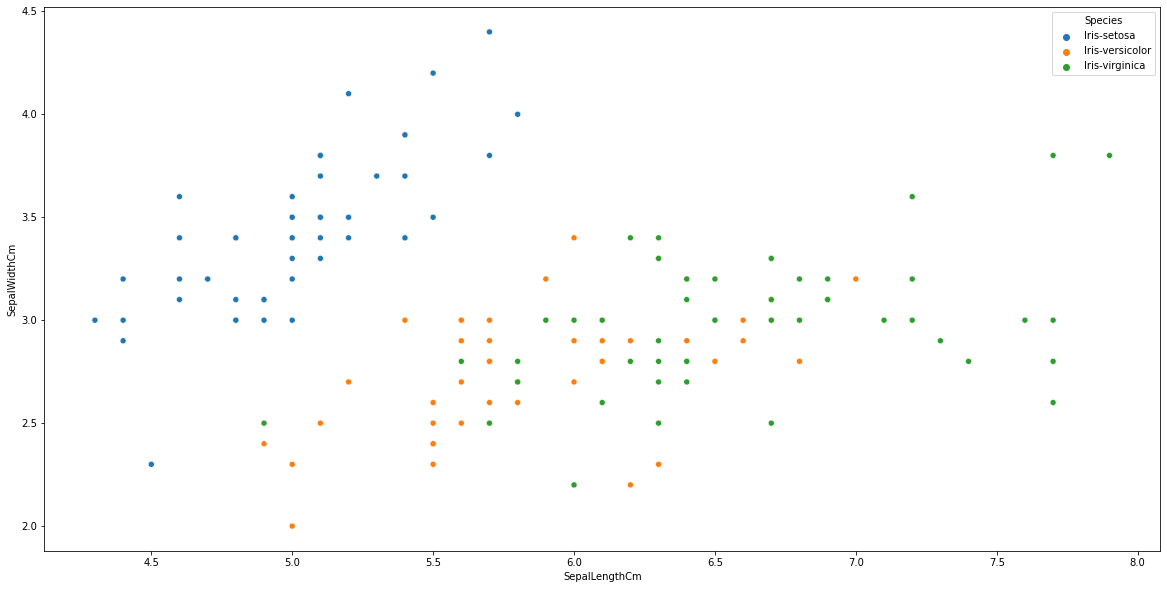

In [12]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

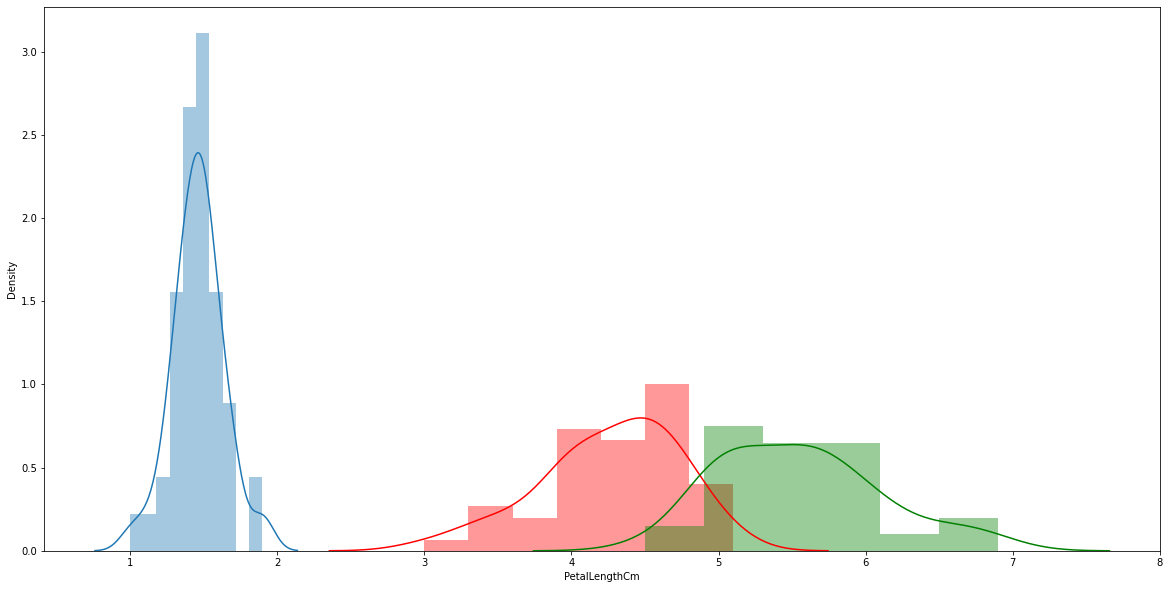

In [13]:
sns.distplot(data[data.Species == "Iris-setosa"].PetalLengthCm)
sns.distplot(data[data.Species == "Iris-versicolor"].PetalLengthCm,color="r")
sns.distplot(data[data.Species == "Iris-virginica"].PetalLengthCm,color="g")

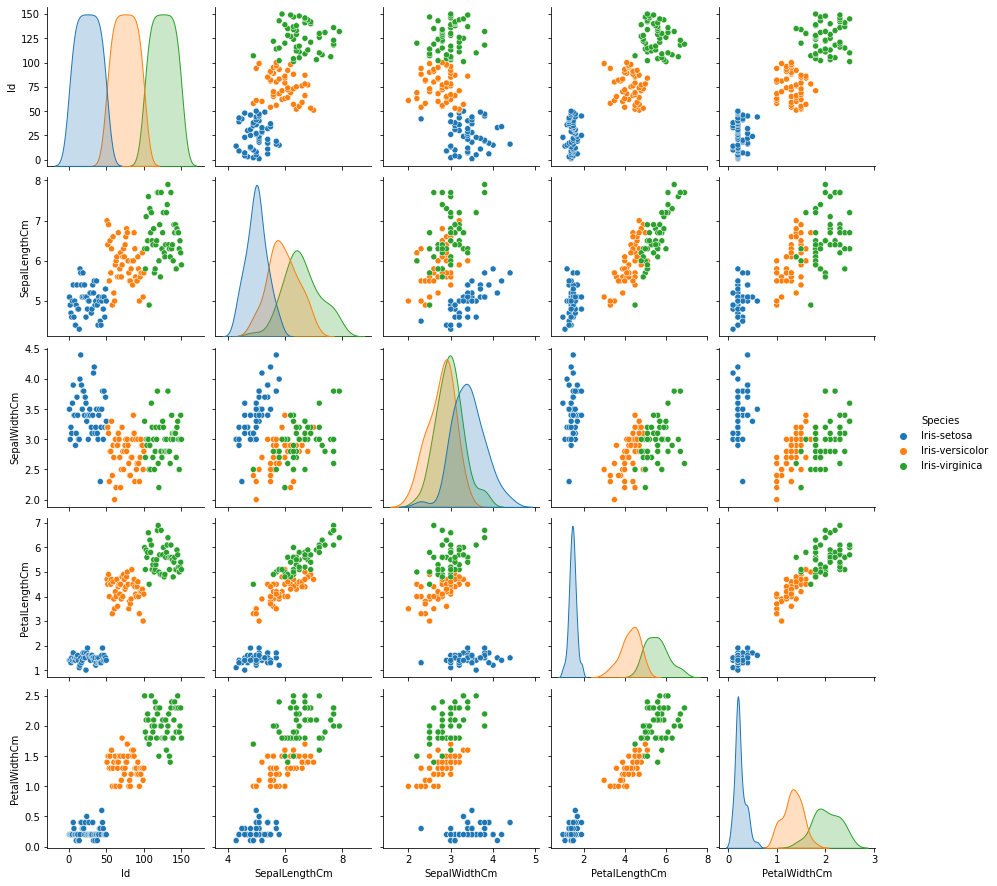

In [14]:
sns.pairplot(data, hue="Species")

### 11.2 Önişleme (Preprocessing)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
#Encoding the label
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Species"]) 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
data["Label"].value_counts()

2    50
1    50
0    50
Name: Label, dtype: int64

In [18]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [19]:
# Dropping unnecessary columns
clases = list(set(data.Species))
data.drop(["Id","Species"], axis=1, inplace=True)

In [20]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# Locate features and label
X, y = data.iloc[: , :-1], data.iloc[: , -1]

In [22]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

### 11.3 Modeli Eğitmek

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [25]:
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.99
Accuracy of test: 0.96


### 11.4 Görselleştirme

In [26]:
import os
from sklearn.tree import export_graphviz

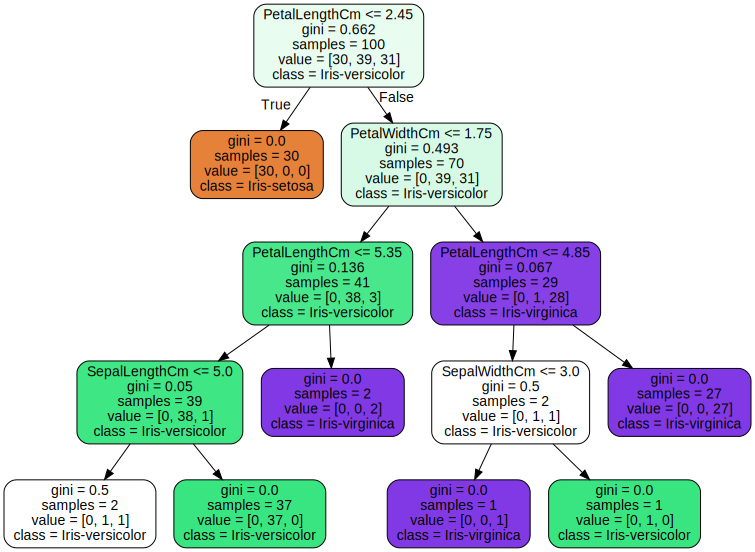

In [27]:
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=categories,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

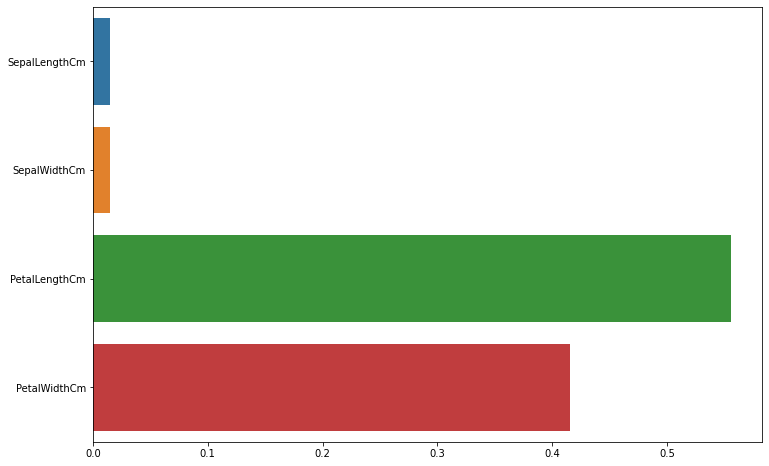

In [28]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [29]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



### 11.5 Metrikler

In [30]:
print(f"Precision = {precision_score(y_test, pred, average='macro')}")
print(f"Recall = {recall_score(y_test, pred, average='macro')}")
print(f"Accuracy = {accuracy_score(y_test, pred)}")
print(f"F1 Score = {f1_score(y_test, pred,average='macro')}")

Precision = 0.9487179487179488
Recall = 0.9649122807017544
Accuracy = 0.96
F1 Score = 0.9537037037037036


In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

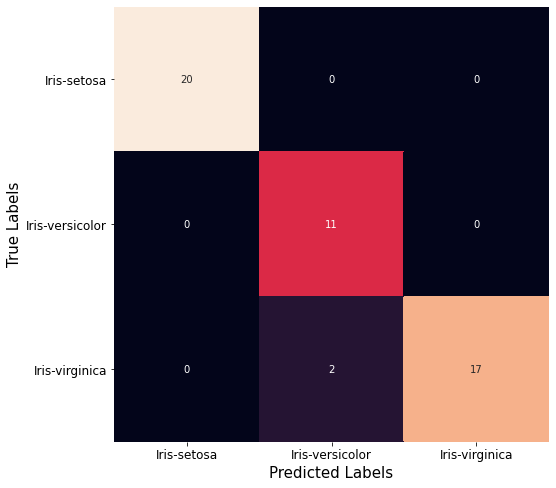

In [32]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
sns.set(font_scale=3.4)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## 12 Ensemble Learning

In ensemble learning theory, we call weak learners (or base models) models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias or high variance. The idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.  
 
<u>Combining weak learners:</u>

**Bagging**: that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process  
<br>
**Boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy  
<br>
**Stacking**, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions

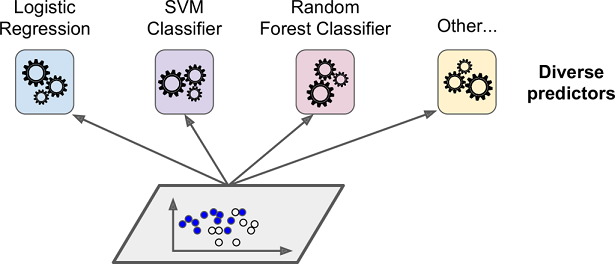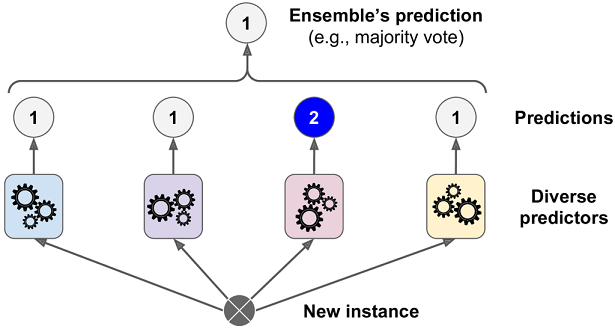

## 13 XGBOOST

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [33]:
import xgboost as xgb

In [34]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [35]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [36]:
categories

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [37]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.0046    , 0.9871078 , 0.00829213],
       [0.00398089, 0.00646372, 0.9895555 ],
       [0.00398902, 0.0044349 , 0.99157614],
       [0.00387317, 0.9924493 , 0.00367761],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.04196233, 0.5648941 , 0.39314362],
       [0.0046    , 0.9871078 , 0.00829213],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.0038679 , 0.9910994 , 0.00503268]], dtype=float32)

In [38]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [39]:
best_preds

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 0])

## 14 Metrikler

In [40]:
print(f"Precision = {precision_score(y_test, best_preds, average='macro')}")
print(f"Recall = {recall_score(y_test, best_preds, average='macro')}")
print(f"Accuracy = {accuracy_score(y_test, best_preds)}")

Precision = 0.9285714285714285
Recall = 0.9473684210526315
Accuracy = 0.94


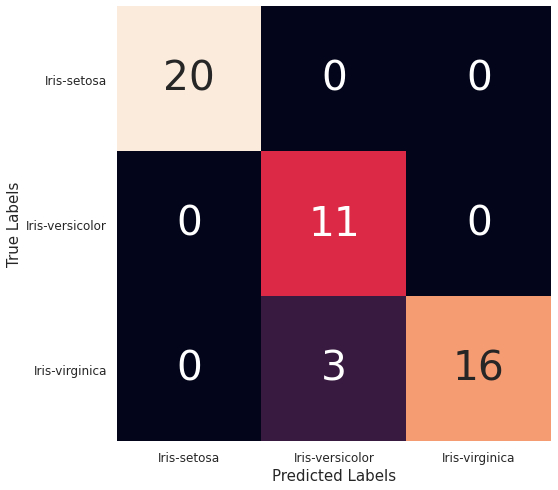

In [41]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [42]:
## Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

In [43]:
param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

In [44]:
xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

In [45]:
print(f"Tuned: {clf.best_params_}") 
print(f"Mean of the cv scores is {clf.best_score_}")
print(f"Train Score {clf.score(X_train,y_train)}")
print(f"Test Score {clf.score(X_test,y_test)}")
print(f"Seconds used for refitting the best model on the train dataset: {clf.refit_time_}")

Tuned: {'max_depth': 3, 'min_child_weight': 1}
Mean of the cv scores is 0.9292929292929294
Train Score 0.97
Test Score 0.96
Seconds used for refitting the best model on the train dataset: 0.17079687118530273


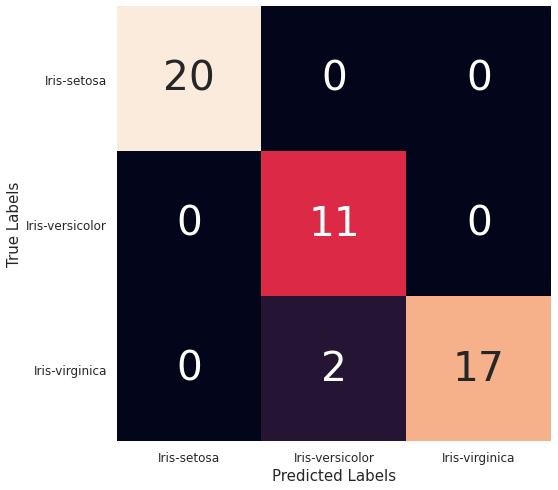

In [46]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()